In [1]:
import pickle

In [2]:
filepath = '/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/cpsc4710_slz4/uncertainty/wandb/run-20251120_024505-6ixcohw1/files/train_generations.pkl'


In [3]:
with open(filepath, 'rb') as f:
    out = pickle.load(f)

In [4]:
out

{'qw_14911--133/133_1320452.txt#0_1': {'question': 'The cocktail called a Tom Collins consists of lemon or lime juice, sugar, soda water and what else?',
  'context': 'Fill up the glass with plain soda water and drink while it is lively . [1] [PAR] This was distinguished from the Gin Fizz cocktail in that the 3 dashes of lemon juice in the Gin Fizz was "fizzed" with carbonated water to essentially form a \'Gin and Sodawater\' whereas the considerably more "juice of a small lemon" in the Tom Collins essentially formed a \'Gin and Sparkling Lemonade\' when sweetened with the gum syrup. [1] The type of gin used by Thomas was not specified in his 1876 book, but likely was Holland gin rather than English London Dry Gin since Jerry Thomas\' Gin Fizz (1862) called for Holland gin and Hollands Gin ( Jenever ) was imported into the United States at that time at a ratio of approximately 6 liters to every liter of English London Dry Gin. [1] [PAR] \xa0 Popularity [PAR] By 1878, the Tom Collins wa

In [40]:
fp2 = '/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/data/generated_paraphrases/train_paraphrases.pkl'
with open(fp2, 'rb') as f:
    o2 = pickle.load(f)
# o2

In [46]:
o2

{'dpql_1576--162/162_595154.txt#0_1': ['What would a woman with multiple husbands have more than one of?',
  'What would a woman who has multiple sexual partners have more than one of?',
  'What would a woman who has multiple spouses have more than one of?'],
 'qz_866--164/164_117566.txt#0_0': ["What seven letter word, starting with 'Ra', is a palindrome?",
  "What word is spelled the same way forward and backward, and has seven letters starting with 'Ra'?",
  "Can you think of a seven letter word that starts with 'Ra' and is a palindrome?"],
 'bt_1--101/101_3091693.txt#0_0': ['Which singer was the lead voice of Stylistics?',
  'Who was the vocalist of the band Stylistics?',
  'What artist was the main singer of Stylistics?'],
 'qb_9503--144/144_528459.txt#0_0': ['Who is the former World Darts Champion known by the nickname ‘The Limestone Cowboy’?'],
 'qz_2260--101/101_60654.txt#0_1': ['In which sea does the river Danube flow?',
  'Where does the river Danube empty into?',
  'Which sea

In [10]:
import datasets
dataset = datasets.load_dataset('TimoImhof/TriviaQA-in-SQuAD-format')['unmodified']
# dataset = dataset.train_test_split(test_size=0.2)
# train_dataset = dataset['train']
# validation_dataset = dataset['test']

In [50]:
print(type(dataset))
print(dataset)

<class 'datasets.arrow_dataset.Dataset'>
Dataset({
    features: ['id', 'question', 'context', 'answers'],
    num_rows: 15368
})


In [11]:
# train_dataset[0]
dataset[0]

{'id': 'tc_276--Hold_On_to_the_Nights.txt#0',
 'question': 'Who had an 80s No 1 hit with Hold On To The Nights?',
 'context': '[DOC] [TLE] Hold On to the Nights"Hold On to the Nights" is a power ballad and number-one hit for American rock singer/songwriter/musician Richard Marx.  This was the fourth and final single released from his self-titled debut album, and the first to reach the top of the Billboard Hot 100 chart. [PAR] Written by Richard Marx, "Hold On to the Nights" reached the Billboard Hot 100 number 1 position on July 23, 1988, preventing Def Leppard\'s "Pour Some Sugar On Me" from reaching the top spot that same week. The song was on the chart for twenty-one weeks, and left the chart at number 65. From Marx\' debut 1987 album, Richard Marx, the song also reached number three on the Billboard Adult Contemporary chart. "Hold On to the Nights" has been re-released numerous albums  and is included on Marx\'s live performance DVD A Night Out with Friends (2012). [PAR] Charts',
 

In [12]:
D = dict()
for row in dataset:
    D[row['id']] = row

In [44]:
# Construction of new dataset of paraphrases
DD = []

for k,v in o2.items():
    info = D[k] # keys: id, question, context, answers
    vc = v.copy()
    vc.append(info['question'])
    
    new_info = {
        'id': info['id'],
        'questions': vc,
        'context': info['context'],
        'answers': info['answers']
    }
    DD.append(new_info)
    # break

In [45]:
DD

[{'id': 'dpql_1576--162/162_595154.txt#0_1',
  'questions': ['What would a woman with multiple husbands have more than one of?',
   'What would a woman who has multiple sexual partners have more than one of?',
   'What would a woman who has multiple spouses have more than one of?',
   'What would a polyandric woman have more than one of?'],
  'context': 'Compare POLYGYNY . [PAR] polyandry [PAR] the mating of a female animal with more than one male.[DOC] [TLE] Polyandric | Article about polyandric by The Free DictionaryPolyandric | Article about polyandric by The Free Dictionary [PAR] Polyandric | Article about polyandric by The Free Dictionary [PAR] http://encyclopedia2.thefreedictionary.com/polyandric [PAR] see marriage marriage, [PAR] socially sanctioned union that reproduces the family. In all societies the choice of partners is generally guided by rules of exogamy (the obligation to marry outside a group); some societies also have rules of endogamy (the obligation to marry within a

In [48]:
with open('paraphrase_dataset.pkl', 'wb') as f:
    pickle.dump(DD, f)

In [51]:
from datasets import Dataset
DDD = Dataset.from_list(DD)

In [52]:
DDD

Dataset({
    features: ['id', 'questions', 'context', 'answers'],
    num_rows: 1700
})

In [2]:
import pickle

In [17]:


with open('data/generated_paraphrases/paraphrase_dataset.pkl', 'rb') as f:
    temp = pickle.load(f)

In [18]:
filtered_temp = []
for i in range(len(temp)):
    if len(temp[i]['questions']) == 4:
        filtered_temp.append(i)

In [19]:
filtered_temp

[0,
 1,
 2,
 4,
 8,
 12,
 19,
 21,
 23,
 25,
 28,
 31,
 32,
 41,
 42,
 43,
 45,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 61,
 63,
 64,
 66,
 67,
 69,
 75,
 78,
 79,
 80,
 84,
 86,
 87,
 89,
 90,
 95,
 96,
 99,
 100,
 104,
 105,
 106,
 109,
 112,
 114,
 116,
 120,
 122,
 123,
 124,
 127,
 128,
 129,
 130,
 132,
 133,
 136,
 137,
 144,
 146,
 149,
 150,
 151,
 152,
 153,
 155,
 158,
 159,
 161,
 163,
 166,
 168,
 169,
 171,
 173,
 174,
 175,
 177,
 179,
 184,
 186,
 192,
 193,
 195,
 196,
 197,
 201,
 202,
 203,
 204,
 205,
 210,
 212,
 216,
 218,
 219,
 220,
 221,
 222,
 223,
 225,
 227,
 228,
 230,
 232,
 236,
 239,
 241,
 249,
 252,
 253,
 254,
 257,
 258,
 261,
 262,
 264,
 267,
 268,
 270,
 272,
 273,
 274,
 275,
 277,
 278,
 279,
 280,
 282,
 284,
 285,
 292,
 296,
 297,
 304,
 305,
 308,
 313,
 315,
 317,
 318,
 320,
 321,
 322,
 323,
 327,
 329,
 330,
 331,
 337,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 353,
 354,
 355,
 359,
 360,
 361,
 365,
 367,
 368,
 369,
 370,

In [12]:
from datasets import Dataset

In [13]:
filtered_temp

[{'id': 'dpql_1576--162/162_595154.txt#0_1',
  'questions': ['What would a woman with multiple husbands have more than one of?',
   'What would a woman who has multiple sexual partners have more than one of?',
   'What would a woman who has multiple spouses have more than one of?',
   'What would a polyandric woman have more than one of?'],
  'context': 'Compare POLYGYNY . [PAR] polyandry [PAR] the mating of a female animal with more than one male.[DOC] [TLE] Polyandric | Article about polyandric by The Free DictionaryPolyandric | Article about polyandric by The Free Dictionary [PAR] Polyandric | Article about polyandric by The Free Dictionary [PAR] http://encyclopedia2.thefreedictionary.com/polyandric [PAR] see marriage marriage, [PAR] socially sanctioned union that reproduces the family. In all societies the choice of partners is generally guided by rules of exogamy (the obligation to marry outside a group); some societies also have rules of endogamy (the obligation to marry within a

In [14]:
filtered_DD = Dataset.from_list(filtered_temp)

In [20]:
with open('four_qs_indices.pkl', 'wb') as f:
    pickle.dump(filtered_temp, f)

In [21]:
with open('data/combined_paraphrase_answers.pkl', 'rb') as f:
    temp = pickle.load(f)

In [85]:
path = "/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/semantic_uncertainty_no_wandb_local_deberta/cpsc4710_slz4/uncertainty/wandb/TRYINGAGAIN9/files/uncertainty_measures_EEEEEE.pkl"

In [86]:
with open(path, 'rb') as f:
    tempy = pickle.load(f)
    

In [104]:
tempy.keys()

dict_keys(['semantic_ids', 'validation_is_false', 'validation_unanswerable', 'uncertainty_measures'])

In [87]:
len(tempy['validation_is_false'])

68

In [88]:
true_subset = [tempy['uncertainty_measures']['semantic_energy'][i] for i in range(len(tempy['uncertainty_measures']['semantic_energy'])) if not tempy['validation_is_false'][i]]
false_subset = [tempy['uncertainty_measures']['semantic_energy'][i] for i in range(len(tempy['uncertainty_measures']['semantic_energy'])) if tempy['validation_is_false'][i]]

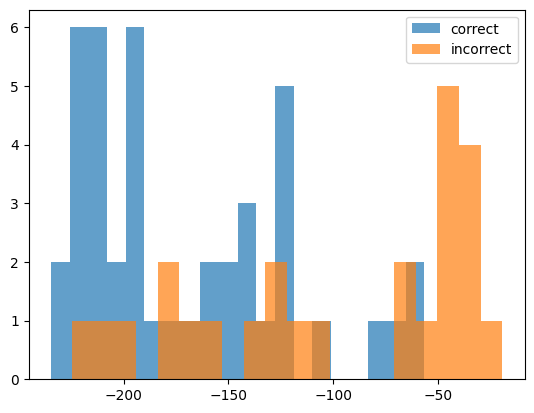

In [89]:
import matplotlib.pyplot as plt 

plt.hist(true_subset, bins=20, alpha=0.7, stacked=True, label="correct")
plt.hist(false_subset, bins=20, alpha=0.7, stacked=True, label="incorrect")
plt.legend()

plt.show()

In [92]:
senergy = [0.7864157119476269, 0.787109375, 0.8009302325581394, 0.8389799635701274]
se = [0.763911620294599, 0.8251953125, 0.8069767441860465, 0.835063752276867]
num_paraphrases = [1,2,3,4]

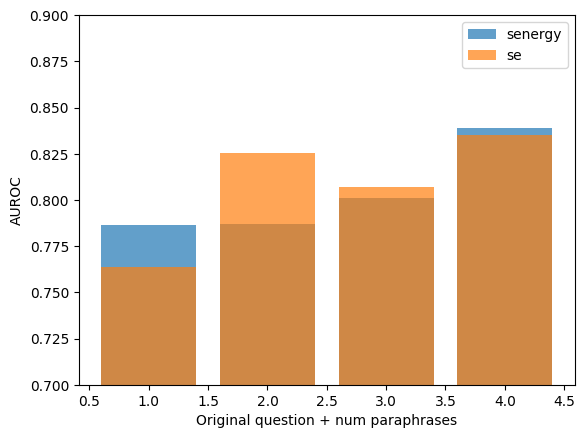

In [99]:
plt.bar(num_paraphrases, senergy, alpha=0.7, label="senergy")
plt.bar(num_paraphrases, se, alpha=0.7, label="se")
plt.gca().set_ylim(0.7, 0.9)
plt.xlabel("Original question + num paraphrases")
plt.ylabel("AUROC")
plt.legend()
plt.show()

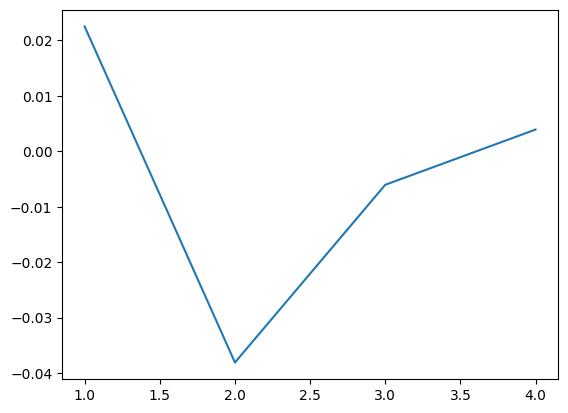

In [102]:
diff = [senergy[i]-se[i] for i in range(4)]
plt.plot(num_paraphrases, diff)
plt.show()

In [105]:
path_no_paraphrase = "/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/semantic_uncertainty_no_wandb_local_deberta/cpsc4710_slz4/uncertainty/wandb/SEnergy_no_paraphrase/files/train_generations.pkl"

In [106]:
path_norm_paraphrase = "/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/semantic_uncertainty_no_wandb_local_deberta/cpsc4710_slz4/uncertainty/wandb/TRYINGAGAIN/files/train_generations.pkl"

In [107]:
with open(path_no_paraphrase, 'rb') as f:
    no_PASE = pickle.load(f)

with open(path_norm_paraphrase, 'rb') as f:
    norm_PASE = pickle.load(f)

In [112]:
no_pase_keys = set(no_PASE.keys())

In [113]:
norm_pase_keys = set(norm_PASE.keys())

In [114]:
intersection_keys = no_pase_keys & norm_pase_keys

In [115]:
len(intersection_keys)

6

In [125]:
with open("/home/cpsc4710_slz4/project_cpsc4710/cpsc4710_slz4/semantic_uncertainty/semantic_uncertainty_no_wandb_local_deberta/cpsc4710_slz4/uncertainty/wandb/run-20251212_214555-vuslog9a/files/validation_generations.pkl", 'rb') as f:
    temp = pickle.load(f)

In [126]:
temp

{'sfq_9985--139/139_2761217.txt#0_0': {'question': 'What was the name of the huge beast, probably a hippo, described in the Book of Job?',
  'context': '[DOC] [TLE] Top 10 Monsters in the Bible - Toptenz.netTop 10 Monsters in the Bible - Toptenz.net [PAR] Toptenz.net [PAR] Posted by Charlotte Coville on [PAR] July 21, 2011 [PAR] in Literature , Religion | 128,224 Views | 20 Responses [PAR] Whether you believe its God’s word, a historical relic, or a load of hogwash, there’s no doubt that the Bible contains some interesting stuff. Like monsters, for example. All sorts of terrible creatures and mythical beasts can be found in its pages. Like… [PAR] 10. The Behemoth [PAR] In Job, one of the Bible’s oldest books, the Behemoth is described as a gigantic, powerful creature that can only be tamed by God. His tail is so large that it ‘moves like a cedar.’ This description has led some Creationists to claim that Behemoth was in fact a Biblical-era dinosaur . However, carbon dating aside, the cr

In [118]:
temp = set(temp.keys())

In [119]:
another = temp & norm_pase_keys

In [120]:
len(another)

116

In [122]:
temp

{'bb_1007--115/115_852571.txt#0_0',
 'bb_1172--22/22_98016.txt#0_0',
 'bb_1220--63/63_857755.txt#0_1',
 'bb_1685--55/55_869512.txt#0_2',
 'bb_1960--194/194_648540.txt#0_1',
 'bb_2321--195/195_16887.txt#0_0',
 'bb_297--170/170_835745.txt#0_1',
 'bb_3474--97/97_910335.txt#0_0',
 'bb_3560--Legendary_creature.txt#0_0',
 'bb_3596--52/52_912389.txt#0_0',
 'bb_3732--157/157_915760.txt#0_1',
 'bb_3834--38/38_905930.txt#0_0',
 'bb_4195--110/110_323317.txt#0_1',
 'bb_4336--80/80_2678356.txt#0_1',
 'bb_4604--87/87_643378.txt#0_0',
 'bb_526--163/163_840950.txt#0_0',
 'bb_5497--152/152_643813.txt#0_0',
 'bb_5563--116/116_955298.txt#0_1',
 'bb_57--102/102_83535.txt#0_2',
 'bb_5740--26/26_958901.txt#0_0',
 'bb_5904--187/187_2609946.txt#0_1',
 'bb_6248--151/151_2947901.txt#0_1',
 'bb_6292--136/136_2683102.txt#0_1',
 'bb_684--87/87_844738.txt#0_1',
 'bb_7278--6/6_2685678.txt#0_0',
 'bb_740--185/185_42073.txt#0_1',
 'bb_8043--195/195_116258.txt#0_0',
 'bb_8232--10/10_805433.txt#0_0',
 'bb_8522--36/36_61

In [2]:
import matplotlib.pyplot as plt

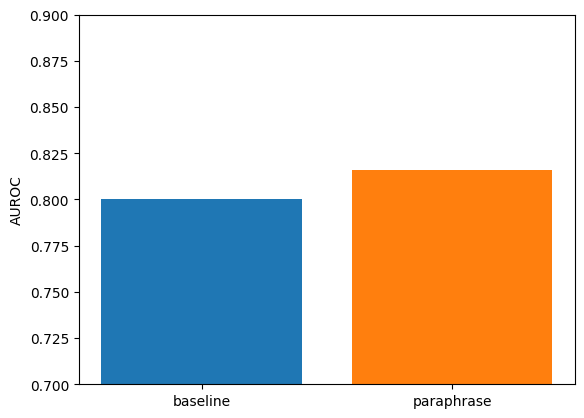

In [5]:
bar1 = 0.8
bar2 = 0.816
plt.bar(0, bar1)
plt.bar(1, bar2)
plt.xticks([0,1], ["baseline", "paraphrase"])
plt.ylim(0.7,0.9)
plt.ylabel("AUROC")
plt.show()